## LDA Topic Modeling 
    - TEST DOC

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from hanspell import spell_checker

from Preprocess import load
from Preprocess.load import DataLoad
from Preprocess.text_preprocess import Preprocess
from Model.evaluate import get_best_topics_df, lda_visualize, get_topics_df
from Model.model import LDAModeling

from gensim.models.ldamodel import LdaModel
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [2]:
loader = DataLoad(
    tran_path="./Data/csv/sample_transcripts.csv",
    meta_path="./Data/csv/sample_videos.csv"
)

In [3]:
texts_dict_popular, texts_dict_unpopular = loader.get_data_set()
print(len(texts_dict_popular))
print(len(texts_dict_unpopular))

30
30


In [28]:
df = loader.load_transcripts()
df_meta = loader.load_meta()

In [74]:
idx = [i for i in df_meta['id'] if i not in df["video_id"].tolist()]
df_meta = df_meta[df_meta["id"].apply(lambda x : x not in idx)]


In [17]:
texts_dict_popular["12"]

[]

In [6]:
texts_dict_unpopular["0"][:10]

['으 으',
 '송년 친구들 안녕하세요 사 온 셈입니다 오늘의 학습 목표는 은혜 공식을',
 '이용하여 이차방정식 의 볼수 있다 입니다',
 '이차 방정식을 푸는 마지막 방법인 그네 공식을 공부할 거에요',
 '우리가 지금까지 배운 이차 방정식을 푸는 방법이 뭐가 있었죠',
 '그쵸 인수분해 를 이용한 방법',
 '제곱근을 이용한 방법이 있었어요 이제 오늘 그 4강 시까지 배우며',
 '여러분이 해결하지 못하는 이차 방정식 은 없습니다',
 '지난 시간에 배웠던 완전 제곱 식을 이용하여 이차 방정식을 푸는 과정을',
 '복습해 볼게요']

In [7]:
texts_dict_popular["0"][:10]

['안녕하세요',
 '[음악]',
 '오늘은',
 '분 술에 선수로 따 5초만에 닦은',
 '다음 법',
 '[음악]',
 '자아',
 '이거 폼 여는',
 '클랑 약 0.5 채워 채워줘요',
 '어떻게 이렇게 빨리 할 수 있느냐']

In [8]:
stop_words = loader.load_stopwords()

In [9]:
preprocessor = Preprocess(stopwords=stop_words)

In [10]:
popular_cleaned = preprocessor.get_cleaned_dict(texts_dict_popular)
unpopular_cleaned = preprocessor.get_cleaned_dict(texts_dict_unpopular)

[Kss]: Oh! You have konlpy.tag.Mecab in your environment. Kss will take this as a backend! :D



  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/251 [00:00<?, ?it/s]

  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/377 [00:00<?, ?it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/185 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

In [11]:
popular_tokenized = preprocessor.tokenize(popular_cleaned)
unpopular_tokenized = preprocessor.tokenize(unpopular_cleaned)

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/251 [00:00<?, ?it/s]

  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/377 [00:00<?, ?it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/185 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

In [12]:
texts_po, dictionary_po, corpus_po = preprocessor.get_lda_inputs(popular_tokenized)
texts_unpo, dictionary_unpo, corpus_unpo = preprocessor.get_lda_inputs(unpopular_tokenized)

In [13]:
model_popular = LDAModeling(
    texts=texts_po,
    dictionary=dictionary_po,
    corpus=corpus_po,
    limit=20,
)

model_unpopular = LDAModeling(
    texts=texts_unpo,
    dictionary=dictionary_unpo,
    corpus=corpus_unpo,
    limit=20,
)

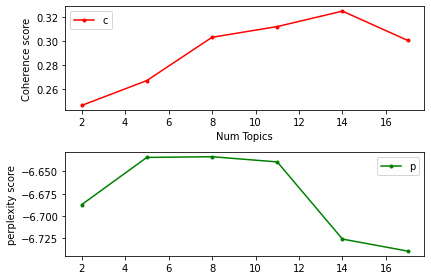

In [14]:
model_popular.plot_optimal_number_of_topics()

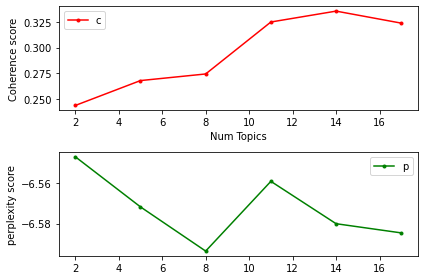

In [15]:
model_unpopular.plot_optimal_number_of_topics()

In [16]:
model_po = model_popular.get_lda_model(14)
model_unpo = model_unpopular.get_lda_model(14)

In [28]:
model_po.print_topics(num_words=5)

[(0, '0.001*"플러스" + 0.001*"제곱" + 0.001*"얘기" + 0.001*"나머지" + 0.001*"문제"'),
 (1, '0.054*"제곱" + 0.038*"플러스" + 0.028*"나머지" + 0.025*"인수" + 0.022*"공식"'),
 (2, '0.060*"제곱" + 0.027*"인수" + 0.021*"형태" + 0.020*"플러스" + 0.016*"분해"'),
 (3, '0.046*"얘기" + 0.036*"플러스" + 0.035*"제곱" + 0.026*"루트" + 0.022*"전개"'),
 (4, '0.001*"방정식" + 0.001*"제곱" + 0.001*"얘기" + 0.001*"플러스" + 0.001*"공식"'),
 (5, '0.081*"제곱" + 0.029*"공식" + 0.026*"문제" + 0.023*"인수" + 0.022*"개수"'),
 (6, '0.032*"플러스" + 0.028*"개수" + 0.028*"인수" + 0.026*"결과" + 0.016*"상수"'),
 (7, '0.056*"제곱" + 0.052*"플러스" + 0.023*"문제" + 0.020*"공식" + 0.018*"방정식"'),
 (8, '0.091*"나머지" + 0.023*"인수" + 0.017*"분해" + 0.017*"제곱" + 0.014*"음수"'),
 (9, '0.036*"인수" + 0.030*"당시" + 0.022*"분해" + 0.021*"다항식" + 0.015*"제곱"'),
 (10, '0.061*"방정식" + 0.026*"문제" + 0.019*"제곱" + 0.014*"내용" + 0.014*"선생"'),
 (11, '0.003*"제곱" + 0.003*"인수" + 0.002*"플러스" + 0.002*"분해" + 0.001*"수분"'),
 (12, '0.069*"인수" + 0.048*"제곱" + 0.031*"공식" + 0.029*"전개" + 0.029*"플러스"'),
 (13, '0.047*"인수" + 0.023*"공통" + 0.022*"복소수" 

In [29]:
model_unpo.print_topics(num_words=5)

[(0, '0.011*"과정" + 0.009*"공식" + 0.009*"연습" + 0.009*"개수" + 0.008*"방법"'),
 (1, '0.080*"제곱" + 0.045*"공식" + 0.029*"플러스" + 0.027*"루트" + 0.024*"인수"'),
 (2, '0.035*"방정식" + 0.021*"개수" + 0.021*"방법" + 0.020*"공식" + 0.016*"적용"'),
 (3, '0.001*"인수" + 0.001*"플러스" + 0.001*"분해" + 0.001*"문제" + 0.001*"방정식"'),
 (4, '0.032*"플러스" + 0.024*"방정식" + 0.021*"공식" + 0.020*"그래프" + 0.017*"플러스마이너스"'),
 (5, '0.058*"플러스" + 0.047*"인수" + 0.031*"문제" + 0.022*"분해" + 0.019*"정리"'),
 (6, '0.001*"인수" + 0.001*"제곱" + 0.001*"공식" + 0.001*"분해" + 0.001*"플러스"'),
 (7, '0.001*"제곱" + 0.001*"공식" + 0.001*"플러스" + 0.000*"계산" + 0.000*"양변"'),
 (8, '0.029*"플러스마이너스" + 0.025*"공식" + 0.025*"플러스" + 0.020*"루트" + 0.015*"연습"'),
 (9, '0.055*"공식" + 0.036*"제곱" + 0.025*"플러스" + 0.016*"루트" + 0.015*"짝수"'),
 (10, '0.017*"학생" + 0.014*"공식" + 0.009*"교육" + 0.009*"암기" + 0.009*"이해"'),
 (11, '0.082*"제곱" + 0.051*"공식" + 0.050*"인수" + 0.036*"세모" + 0.036*"세제곱"'),
 (12, '0.001*"공식" + 0.001*"방정식" + 0.001*"제곱" + 0.001*"플러스" + 0.001*"플러스마이너스"'),
 (13, '0.019*"제목" + 0.015*"문제" 

In [19]:
po_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

for idx, row in enumerate(model_po[corpus_po]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_number, prob_topic) in enumerate(row):
        if j == 0:
            topics = model_po.show_topic(topic_number)
            topic_keywords = ", ".join([word for word, prob in topics])
            append_list = [int(topic_number), round(prob_topic, 4), topic_keywords]
            po_topics_df.loc[idx] = append_list
        else:
            break

po_topics_df["Original_Texts"] = texts_unpo

po_topics_df

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Original_Texts
0,13,0.9889,"인수, 공통, 복소수, 방정식, 반지름, 제곱, 표현, 분해, 얘기, 수분","[송년, 학습, 목표, 은혜, 공식, 방정식, 방정식, 방법, 그네, 공식, 공부,..."
1,13,0.9985,"인수, 공통, 복소수, 방정식, 반지름, 제곱, 표현, 분해, 얘기, 수분","[제곱, 완전체, 제곱, 표현, 제곱, 시기, 예수, 보리, 절임, 어사, 모양, ..."
2,13,0.9974,"인수, 공통, 복소수, 방정식, 반지름, 제곱, 표현, 분해, 얘기, 수분","[방정식, 공식, 방정식, 보식, 수학, 공부, 오랫동안, 기억, 내고, 시기, 그..."
3,10,0.9776,"방정식, 문제, 제곱, 내용, 선생, 시기, 플러스, 이야기, 연습, 단원","[도식, 수문, 당황, 기본, 인수, 위원회, 분해, 부등식, 기본, 방법, 함수,..."
4,5,0.9947,"제곱, 공식, 문제, 인수, 개수, 절반, 플러스, 분해, 세모, 얘기","[음악계, 문제, 공식, 풀이, 공식, 짝수, 계산, 확인, 대입, 서식, 계산, ..."
5,7,0.9965,"제곱, 플러스, 문제, 공식, 방정식, 얘기, 루트, 선생, 인수, 수분","[공식, 방정식, 풀이, 해결, 문제, 풀이, 대응, 정리, 차원, 정신, 플러스,..."
6,1,0.9992,"제곱, 플러스, 나머지, 인수, 공식, 수분, 시작, 얘기, 정리, 분해","[인수, 공부, 인수, 분해, 내용, 정리, 중단원, 마무리, 문제, 수분, 내용,..."
7,7,0.9980,"제곱, 플러스, 문제, 공식, 방정식, 얘기, 루트, 선생, 인수, 수분","[올인, 선생, 대단원, 단원, 다항식, 코스, 코스, 인수, 분해, 코스, 수분,..."
8,1,0.9985,"제곱, 플러스, 나머지, 인수, 공식, 수분, 시작, 얘기, 정리, 분해","[자평, 여학생, 방정식, 방정식, 체계, 제곱근, 무리수, 아이드, 곱셈, 공식,..."
9,7,0.9970,"제곱, 플러스, 문제, 공식, 방정식, 얘기, 루트, 선생, 인수, 수분","[공식, 예상, 방정식, 방정식, 장식, 중요, 개념, 계정, 제곱근, 개념, 이참..."


In [20]:
unpo_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

for idx, row in enumerate(model_unpo[corpus_unpo]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_number, prob_topic) in enumerate(row):
        if j == 0:
            topics = model_unpo.show_topic(topic_number)
            topic_keywords = ", ".join([word for word, prob in topics])
            append_list = [int(topic_number), round(prob_topic, 4), topic_keywords]
            unpo_topics_df.loc[idx] = append_list
        else:
            break

unpo_topics_df["Original_Texts"] = texts_unpo

unpo_topics_df

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Original_Texts
0,2,0.5220,"방정식, 개수, 방법, 공식, 적용, 소수, 분수, 공부, 제곱근, 음수","[송년, 학습, 목표, 은혜, 공식, 방정식, 방정식, 방법, 그네, 공식, 공부,..."
1,9,0.9963,"공식, 제곱, 플러스, 루트, 짝수, 표현, 플러스마이너스, 분해, 방법, 사회","[제곱, 완전체, 제곱, 표현, 제곱, 시기, 예수, 보리, 절임, 어사, 모양, ..."
2,5,0.8794,"플러스, 인수, 문제, 분해, 정리, 플러스마이너스, 수분, 제곱, 방법, 방정식","[방정식, 공식, 방정식, 보식, 수학, 공부, 오랫동안, 기억, 내고, 시기, 그..."
3,4,0.9959,"플러스, 방정식, 공식, 그래프, 플러스마이너스, 루트, 방법, 부등식, 판별, 관계","[도식, 수문, 당황, 기본, 인수, 위원회, 분해, 부등식, 기본, 방법, 함수,..."
4,10,0.7948,"학생, 공식, 교육, 암기, 이해, 계산, 과정, 효율, 방향, 서식","[음악계, 문제, 공식, 풀이, 공식, 짝수, 계산, 확인, 대입, 서식, 계산, ..."
5,5,0.9983,"플러스, 인수, 문제, 분해, 정리, 플러스마이너스, 수분, 제곱, 방법, 방정식","[공식, 방정식, 풀이, 해결, 문제, 풀이, 대응, 정리, 차원, 정신, 플러스,..."
6,5,0.9869,"플러스, 인수, 문제, 분해, 정리, 플러스마이너스, 수분, 제곱, 방법, 방정식","[인수, 공부, 인수, 분해, 내용, 정리, 중단원, 마무리, 문제, 수분, 내용,..."
7,11,0.9990,"제곱, 공식, 인수, 세모, 세제곱, 분해, 문제, 네모, 수분, 선생","[올인, 선생, 대단원, 단원, 다항식, 코스, 코스, 인수, 분해, 코스, 수분,..."
8,1,0.9983,"제곱, 공식, 플러스, 루트, 인수, 방정식, 플러스마이너스, 분해, 분의, 선생","[자평, 여학생, 방정식, 방정식, 체계, 제곱근, 무리수, 아이드, 곱셈, 공식,..."
9,1,0.9979,"제곱, 공식, 플러스, 루트, 인수, 방정식, 플러스마이너스, 분해, 분의, 선생","[공식, 예상, 방정식, 방정식, 장식, 중요, 개념, 계정, 제곱근, 개념, 이참..."


In [ ]:
model_unpopular.plot_optimal_number_of_topics()

In [96]:
visualization = gensimvis.prepare(model_po, corpus_po, dictionary, sort_topics=False)
pyLDAvis.save_html(visualization, f"/Users/jylee/Desktop/GeniA_project/Topic_Modeling/Data/po.html")

In [97]:
visualization = gensimvis.prepare(model_unpo, corpus_unpo, dictionary, sort_topics=False)
pyLDAvis.save_html(visualization, f"/Users/jylee/Desktop/GeniA_project/Topic_Modeling/Data/unpo.html")

---
## Total

In [108]:
total_texts = texts_po + texts_unpo

In [109]:
total_dict = corpora.Dictionary(total_texts)

In [110]:
total_corpus = [total_dict.doc2bow(text) for text in total_texts]

In [101]:
total_dict.filter_extremes(no_below=2)

In [102]:
len(total_dict)

1438

In [111]:
model_total = LDAModeling(
    texts=total_texts,
    dictionary=total_dict,
    corpus=total_corpus,
    limit=20,
)

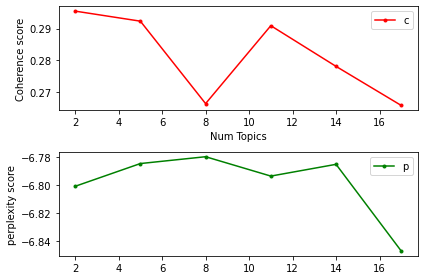

In [112]:
model_total.plot_optimal_number_of_topics()

In [113]:
model = LdaModel(corpus=total_corpus, id2word=total_dict, num_topics=2, passes=20, random_state=42)

In [68]:
sent_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
ldamodel = model

for idx, row in enumerate(ldamodel[total_corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_number, prob_topic) in enumerate(row):
        if j == 0:
            topics = ldamodel.show_topic(topic_number)
            topic_keywords = ", ".join([word for word, prob in topics])
            append_list = [int(topic_number), round(prob_topic, 4), topic_keywords]
            sent_topics_df.loc[idx] = append_list
        else:
            break

sent_topics_df["Original_Texts"] = total_texts

sent_topics_df

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Original_Texts
0,0,0.9919,"제곱, 플러스, 공식, 루트, 얘기, 플러스마이너스, 방정식, 문제, 인수, 분의","[선수, 자아, 클랑, 분수, 소수, 이유, 순위, 크기, 가늠, 가능, 범행, 정..."
1,1,0.9987,"인수, 제곱, 플러스, 공식, 분해, 문제, 수분, 방정식, 선생, 얘기","[허수, 반감, 루트, 루트, 루트, 정의, 수확, 필요, 설명, 정의, 동기, 부..."
2,1,0.9981,"인수, 제곱, 플러스, 공식, 분해, 문제, 수분, 방정식, 선생, 얘기","[대망, 인수, 분해, 인수, 분해, 인순, 어데, 서민, 이인수, 문의, 제곱근,..."
3,1,0.9981,"인수, 제곱, 플러스, 공식, 분해, 문제, 수분, 방정식, 선생, 얘기","[방정식, 파트, 언정, 불줄, 인숙, 가능, 수분, 연습, 방정식, 클릭, 인수,..."
4,0,0.9915,"제곱, 플러스, 공식, 루트, 얘기, 플러스마이너스, 방정식, 문제, 인수, 분의","[수학, 방정식, 정수, 개수, 음식, 방정식, 문제, 인수, 분해, 그늘, 채널,..."
5,0,0.7594,"제곱, 플러스, 공식, 루트, 얘기, 플러스마이너스, 방정식, 문제, 인수, 분의","[수분, 선생, 인수, 스템, 리딩, 공통, 인수, 카드, 내용, 공통, 스텝, 스..."
6,0,0.9993,"제곱, 플러스, 공식, 루트, 얘기, 플러스마이너스, 방정식, 문제, 인수, 분의","[겨울, 행복감, 위너, 크리스마스, 위너, 위너, 도리, 월매, 선데이, 위도, ..."
7,1,0.9985,"인수, 제곱, 플러스, 공식, 분해, 문제, 수분, 방정식, 선생, 얘기","[대왕, 인수, 분해, 파트, 추가, 선생, 내용, 마음, 준비, 이야기, 마음, ..."
8,1,0.9988,"인수, 제곱, 플러스, 공식, 분해, 문제, 수분, 방정식, 선생, 얘기","[수학, 동주, 인수, 분해, 에다마메, 수업, 인수, 연습, 필요, 이해, 연습,..."
9,0,0.9979,"제곱, 플러스, 공식, 루트, 얘기, 플러스마이너스, 방정식, 문제, 인수, 분의","[대망, 그네, 공식, 선생, 노래, 이야기, 기대, 음치, 선생, 제곱근, 방정식..."


In [69]:
sent_topics_df["Dominant_Topic"].value_counts()

Dominant_Topic
0    39
1    21
Name: count, dtype: int64

In [70]:
po_df = sent_topics_df[:30]
unpo_df = sent_topics_df[-30:]

In [71]:
po_df['Dominant_Topic'].value_counts()

Dominant_Topic
0    17
1    13
Name: count, dtype: int64

In [72]:
unpo_df['Dominant_Topic'].value_counts()

Dominant_Topic
0    22
1     8
Name: count, dtype: int64

In [75]:
model.show_topic(1)

[('인수', 0.041122276),
 ('제곱', 0.03741405),
 ('플러스', 0.028521044),
 ('공식', 0.0200454),
 ('분해', 0.01999942),
 ('문제', 0.018794624),
 ('수분', 0.01689082),
 ('방정식', 0.012779814),
 ('선생', 0.011557657),
 ('얘기', 0.010534113)]

In [115]:
visualization = gensimvis.prepare(model, total_corpus, total_dict, sort_topics=False)
pyLDAvis.save_html(visualization, f"/Users/jylee/Desktop/GeniA_project/Topic_Modeling/Data/total.html")

In [7]:
import os

print(os.getcwd())
print(os.path.abspath('./Data/csv/'))

/Users/jylee/Desktop/GeniA_project/Topic_Modeling/LDA
/Users/jylee/Desktop/GeniA_project/Topic_Modeling/LDA/Data/csv


In [3]:
pathname = os.path.join("root", "directory1", "directory2")
print(pathname)


root/directory1/directory2


In [2]:
from Preprocess.load import save_dataframe

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame()

In [5]:
save_dataframe(df, "test.csv")

In [8]:
os.path.dirname(r"./Data/csv/")

'./Data/csv'